In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# Load the data
file_path = Path("crypto_data.csv")
df = pd.read_csv(file_path, index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
df.shape

(1252, 6)

# Data Preparation

In [4]:
#drop the IsTrading column from the dataframe.
df=df.drop(columns=['IsTrading'])
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(1252, 5)

In [6]:
#delete null values
df.dropna(inplace=True)
df.shape

(744, 5)

In [7]:
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [8]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
df[df['TotalCoinSupply']> '0'].head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [9]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
crypto_name_df = pd.DataFrame(df.CoinName)
print(crypto_name_df.shape)
crypto_name_df.head()

(744, 1)


,CoinName
42,42 Coin
404,404Coin
808,808
1337,EliteCoin
BTC,Bitcoin


In [10]:
#delete the CoinName from the original dataframe.
df =df.drop(columns=['CoinName'])
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
808,SHA-256,PoW/PoS,0.000000e+00,0
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000


In [11]:
#Convert the remaining features with text values, Algorithm and ProofType, into numerical data.
X = pd.get_dummies(df, columns=['Algorithm', 'ProofType'])
X.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
808,0.000000e+00,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Standardize data
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.10047714, -0.03668886, -0.03668644, ..., -0.03668644,
        -0.03668644, -0.03668644],
       [-0.07317373, -0.0366887 , -0.03668644, ..., -0.03668644,
        -0.03668644, -0.03668644],
       [-0.10047714, -0.03668886, -0.03668644, ..., -0.03668644,
        -0.03668644, -0.03668644],
       ...,
       [-0.10028834, -0.03668885, -0.03668644, ..., -0.03668644,
        -0.03668644, -0.03668644],
       [-0.10047382, -0.03668886, -0.03668644, ..., -0.03668644,
        -0.03668644, -0.03668644],
       [-0.09992104, -0.03668883, -0.03668644, ..., -0.03668644,
        -0.03668644, -0.03668644]])

# Dimensionality Reduction

In [13]:
#Perform dimensionality reduction with PCA using principle components 3.
pca = PCA(n_components=3)
crypto_pca=pca.fit_transform(X_scaled)
crypto_pca

array([[-0.21872723,  1.2501467 , -0.33482477],
       [-0.20310173,  1.24836404, -0.33493324],
       [-0.1463477 ,  0.90165434, -0.24256192],
       ...,
       [-0.30636454, -1.9563256 ,  0.18344238],
       [-0.03591252,  0.68312995, -0.09494445],
       [-0.21840899,  1.25011039, -0.33482698]])

In [14]:
# Transform PCA data to a DataFrame
pca_df=pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2", "principal component 3"], index=df.index)
pca_df.head()

,principal component 1,principal component 2,principal component 3
42,-0.218727,1.250147,-0.334825
404,-0.203102,1.248364,-0.334933
808,-0.146348,0.901654,-0.242562
1337,0.376892,2.040304,-0.386252
BTC,-0.213341,-1.415755,0.066354


In [15]:
#check the dimensions
pca_df.shape

(744, 3)

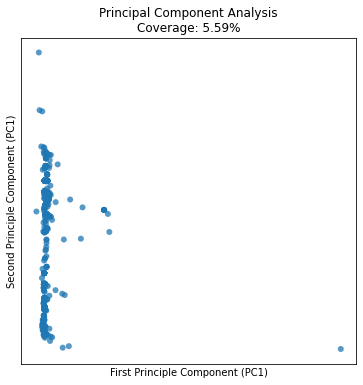

In [25]:
plt.figure(figsize=(6, 6))
plt.scatter(
    x = crypto_pca[:,0],
    y = crypto_pca[:,1],
    alpha = 0.75,
    edgecolors="none",
)
plt.title("Principal Component Analysis\n" + 
          f"Coverage: {round(100 * sum(pca.explained_variance_ratio_), 2)}%")
plt.xlabel('First Principle Component (PC1)')
plt.ylabel('Second Principle Component (PC1)')
plt.xticks([])
plt.yticks([])

plt.show()

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [26]:
#further reduce the dataset dimensions with t-SNE and visually inspect the results.
# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(crypto_pca)

In [27]:
tsne_result_scaled = StandardScaler().fit_transform(tsne_features)

In [30]:
# Check that dimensions have been reduced to two
tsne_result_scaled.shape

(744, 2)

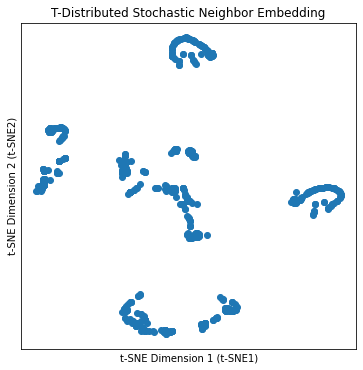

In [31]:
# Visualize the clusters
plt.figure(figsize=(6, 6))
plt.scatter(tsne_result_scaled[:,0], tsne_result_scaled[:,1])
plt.title("T-Distributed Stochastic Neighbor Embedding")
plt.xlabel('t-SNE Dimension 1 (t-SNE1)')
plt.ylabel('t-SNE Dimension 2 (t-SNE2)')
plt.xticks([])
plt.yticks([])
plt.show()


# Cluster Analysis with k-Means

In [21]:
# Create an elbow plot to find the best value for K.

# Initialize empty inertia list
inertia = []
# Initialize k range
k = list(range(1,11))

# Looping through k list
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve 
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\ohkyu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,671748.687500
1,2,356544.718750
2,3,181949.296875
3,4,105525.500000
4,5,60238.320312


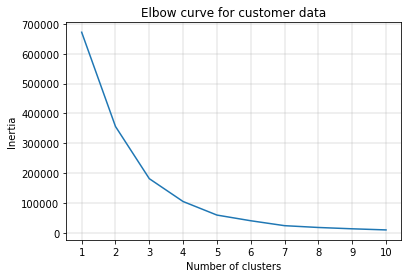

In [22]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.grid(linewidth = 0.4)
plt.show()

In [23]:
#Running K-Means with k=<your best value for k here>
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pca_df)

# Get Predict clusters
predictions = model.predict(pca_df)
predictions

array([2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2,

In [32]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pca_df)

# Predict clusters
predictions = model.predict(pca_df)

# Create a new DataFrame including predicted clusters and cryptocurrencies features
clustered_df=pd.DataFrame({
    "Algorithm": df.Algorithm,
    "ProofType": df.ProofType,
    "TotalCoinsMined": df.TotalCoinsMined,
    "TotalCoinSupply": df.TotalCoinSupply,
    "PC1": pca_df["principal component 1"],
    "PC2": pca_df["principal component 2"],
    "PC3": pca_df["principal component 3"],
    "CoinName": crypto_name_df,
    "Class": model.labels_,
    },index= df.index)
clustered_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.218727,1.250147,-0.334825,"(C, o, i, n, N, a, m, e)",2
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.203102,1.248364,-0.334933,"(C, o, i, n, N, a, m, e)",2
808,SHA-256,PoW/PoS,0.000000e+00,0,-0.146348,0.901654,-0.242562,"(C, o, i, n, N, a, m, e)",2
1337,X13,PoW/PoS,2.927942e+10,314159265359,0.376892,2.040304,-0.386252,"(C, o, i, n, N, a, m, e)",2
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.213341,-1.415755,0.066354,"(C, o, i, n, N, a, m, e)",0
ETH,Ethash,PoW,1.076842e+08,0,-0.251888,-2.119500,0.162489,"(C, o, i, n, N, a, m, e)",0
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.285053,-1.067339,-0.025914,"(C, o, i, n, N, a, m, e)",0
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.200448,1.524742,-0.363887,"(C, o, i, n, N, a, m, e)",2
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.276957,-2.276554,0.160475,"(C, o, i, n, N, a, m, e)",0
ETC,Ethash,PoW,1.133597e+08,210000000,-0.251804,-2.119509,0.162488,"(C, o, i, n, N, a, m, e)",0


In [33]:
# Visualizing Results
# 3D-Scatter with Clusters

In [ ]:
fig=px.scatter_3d(
    clustered_df,
    x="PC3",
    y="PC2",
    z="PC1",
    color="Class",
    symbol="Class",
    width=800,
    hover_name="CoinName",
    hover_data=["Algorithm"]
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

# Recommendation

In [ ]:
#Based on the 3D-Scatter  with clusters, it turns out there are 4 clusters together as pictures.